## This script demonstrates the process of generating kappa and gamma values from both halo and GLASS data sources, and how to visualize the joint distribution of the total kappa and gamma values.

First, we import necessary modules and classes from `sim_pipeline.halos.halos_plus_glass` and `astropy.cosmology`. We also define our cosmology model using `FlatLambdaCDM` with parameters `H0=70` and `Om0=0.3`.
Next, we read the glass data from the file `"z5data.npy"` using the `read_glass_data` function. It returns the kappa values, gamma values, and nside. Then, we calculate the sky area using `skyarea_form_n` function with the `nside`.

In [1]:
#TODO: make it more realistic including:                                                                                           1. use z5data.npy(~780MB) and make n from generate_samples_from_glass.() equal a higher number.                                  2. In generate_halos_multiple_times(n_times=5, skypy_config=None, skyarea=0.0001, cosmo=cosmo, samples_number_for_one_halos=1000, renders_numbers=200) let skyarea=skyarea, n_times larger.                                      3. For lower halo mass min? (now 5*10^11)
from sim_pipeline.halos.halos_plus_glass import read_glass_data,skyarea_form_n,generate_samples_from_glass,generate_halos_multiple_times,halos_plus_glass
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

kappa_values, gamma_values, nside = read_glass_data(file_name="z5data.npy")
skyarea = skyarea_form_n(nside)
kappa_random_glass, gamma_random_glass = generate_samples_from_glass(kappa_values, gamma_values, n=10000)
print(kappa_random_glass.shape)

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


(10000,)


After that, we generate kappa and gamma values from halos using `generate_halos_multiple_times` function. This function repeats the generation of halos `n_times` times and accumulates the results.

In [2]:
kappa_random_halos, gamma_random_halos = generate_halos_multiple_times(n_times=5, skypy_config=None, skyarea=skyarea, cosmo=cosmo, samples_number_for_one_halos=1000, renders_numbers=2000)
print(kappa_random_halos.shape)

100%|██████████| 340/340 [00:14<00:00, 24.06it/s]


Elapsed time for computing the halos mass for the list: 14.133955478668213 seconds



 20%|██        | 1/5 [05:18<21:14, 318.61s/it]

For this halos list, elapsed time for computer weak-lensing maps: 303.98538541793823 seconds



100%|██████████| 340/340 [00:12<00:00, 26.94it/s]


Elapsed time for computing the halos mass for the list: 12.634702682495117 seconds



 40%|████      | 2/5 [10:37<15:55, 318.64s/it]

For this halos list, elapsed time for computer weak-lensing maps: 305.8870313167572 seconds



100%|██████████| 340/340 [00:12<00:00, 27.37it/s]


Elapsed time for computing the halos mass for the list: 12.421135902404785 seconds



 60%|██████    | 3/5 [15:46<10:28, 314.30s/it]

For this halos list, elapsed time for computer weak-lensing maps: 296.5217182636261 seconds



100%|██████████| 340/340 [00:11<00:00, 28.55it/s]


Elapsed time for computing the halos mass for the list: 11.910449028015137 seconds



 80%|████████  | 4/5 [20:54<05:11, 311.91s/it]

For this halos list, elapsed time for computer weak-lensing maps: 296.1675624847412 seconds



100%|██████████| 340/340 [00:12<00:00, 26.25it/s]


Elapsed time for computing the halos mass for the list: 12.952201128005981 seconds



100%|██████████| 5/5 [26:03<00:00, 312.63s/it]

For this halos list, elapsed time for computer weak-lensing maps: 295.3843276500702 seconds
Elapsed time: 1563.2842206954956 seconds
(10000,)


The total kappa and gamma values are then calculated by combining the values from halo and glass data sources. This is done by the `halos_plus_glass` function.

In [3]:
total_kappa, total_gamma = halos_plus_glass(kappa_random_glass, gamma_random_glass, kappa_random_halos, gamma_random_halos)

Finally, we visualize the joint distribution of the total kappa and gamma values using a hexbin plot.
We also fit a Gaussian KDE to the joint distribution of kappa and gamma values and generate a random sample from this distribution.
The joint distribution of the resampled kappa and gamma values is also visualized using a hexbin plot.

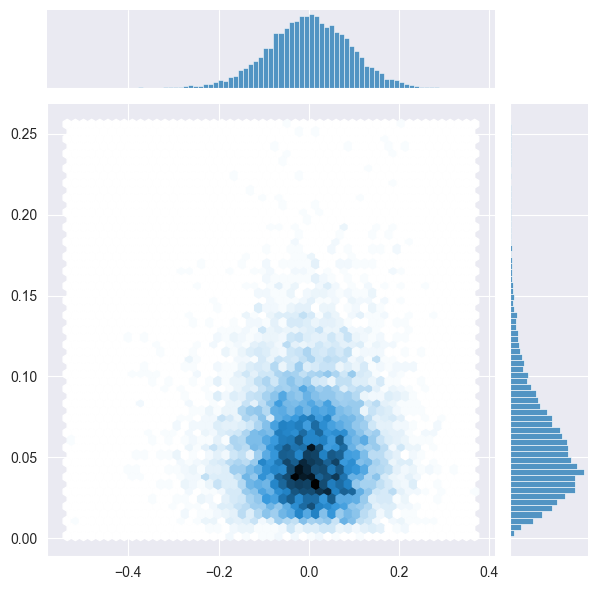

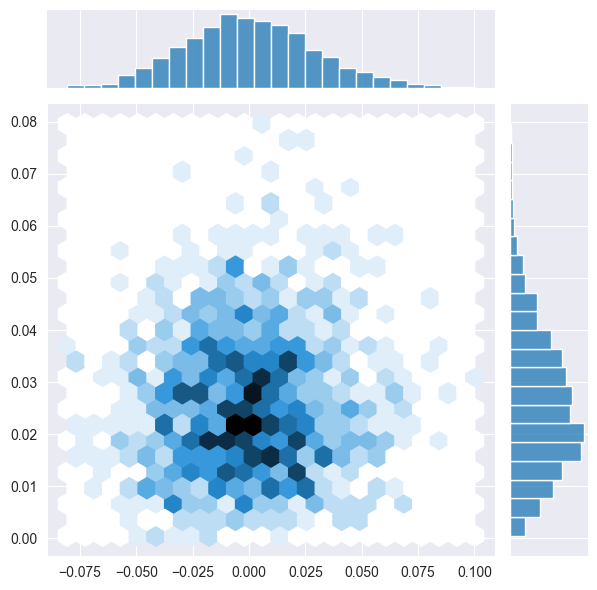

In [4]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

sns.jointplot(x=total_kappa, y=total_gamma, kind='hex')
plt.show()

# Use Gaussian KDE to fit the joint distribution
kernel = stats.gaussian_kde(np.vstack([kappa_values, gamma_values]))
n = 1000  # Number of random numbers to generate
kappa_random, gamma_random = kernel.resample(n)
sns.jointplot(x=kappa_random, y=gamma_random, kind='hex')
plt.show()